In [95]:
import pandas as pd
import io
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from google.colab import files

In [96]:
student_por = files.upload()

Saving student-por.csv to student-por (1).csv


In [97]:
df_student_por = pd.read_csv(io.BytesIO(student_por['student-por.csv']))

In [98]:
df_student_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [99]:
df_student_por_encode = pd.get_dummies(df_student_por, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])

In [100]:
df_student_por_encode

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


In [101]:
train_dataset_por = df_student_por_encode.sample(frac=0.8, random_state=0)
test_dataset_por = df_student_por_encode.drop(train_dataset_por.index)

In [102]:
test_dataset_por

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
9,15,3,4,1,2,0,5,5,1,1,1,5,0,12,12,13,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0
11,15,2,1,3,3,0,5,2,2,1,1,4,0,10,12,13,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0
19,16,4,3,1,1,0,3,1,3,1,3,5,6,12,12,12,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0
23,16,2,2,2,2,0,5,4,4,2,4,5,2,10,10,10,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0
25,16,2,2,1,1,0,1,2,2,1,3,5,6,10,11,12,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,18,3,3,2,2,0,4,3,2,1,3,3,6,13,12,13,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1
627,18,1,2,3,1,0,4,3,3,2,3,3,3,9,10,10,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
629,17,1,2,1,1,0,3,5,5,1,3,1,4,7,8,9,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0
633,18,4,4,1,2,0,5,4,3,3,4,2,1,13,14,14,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0


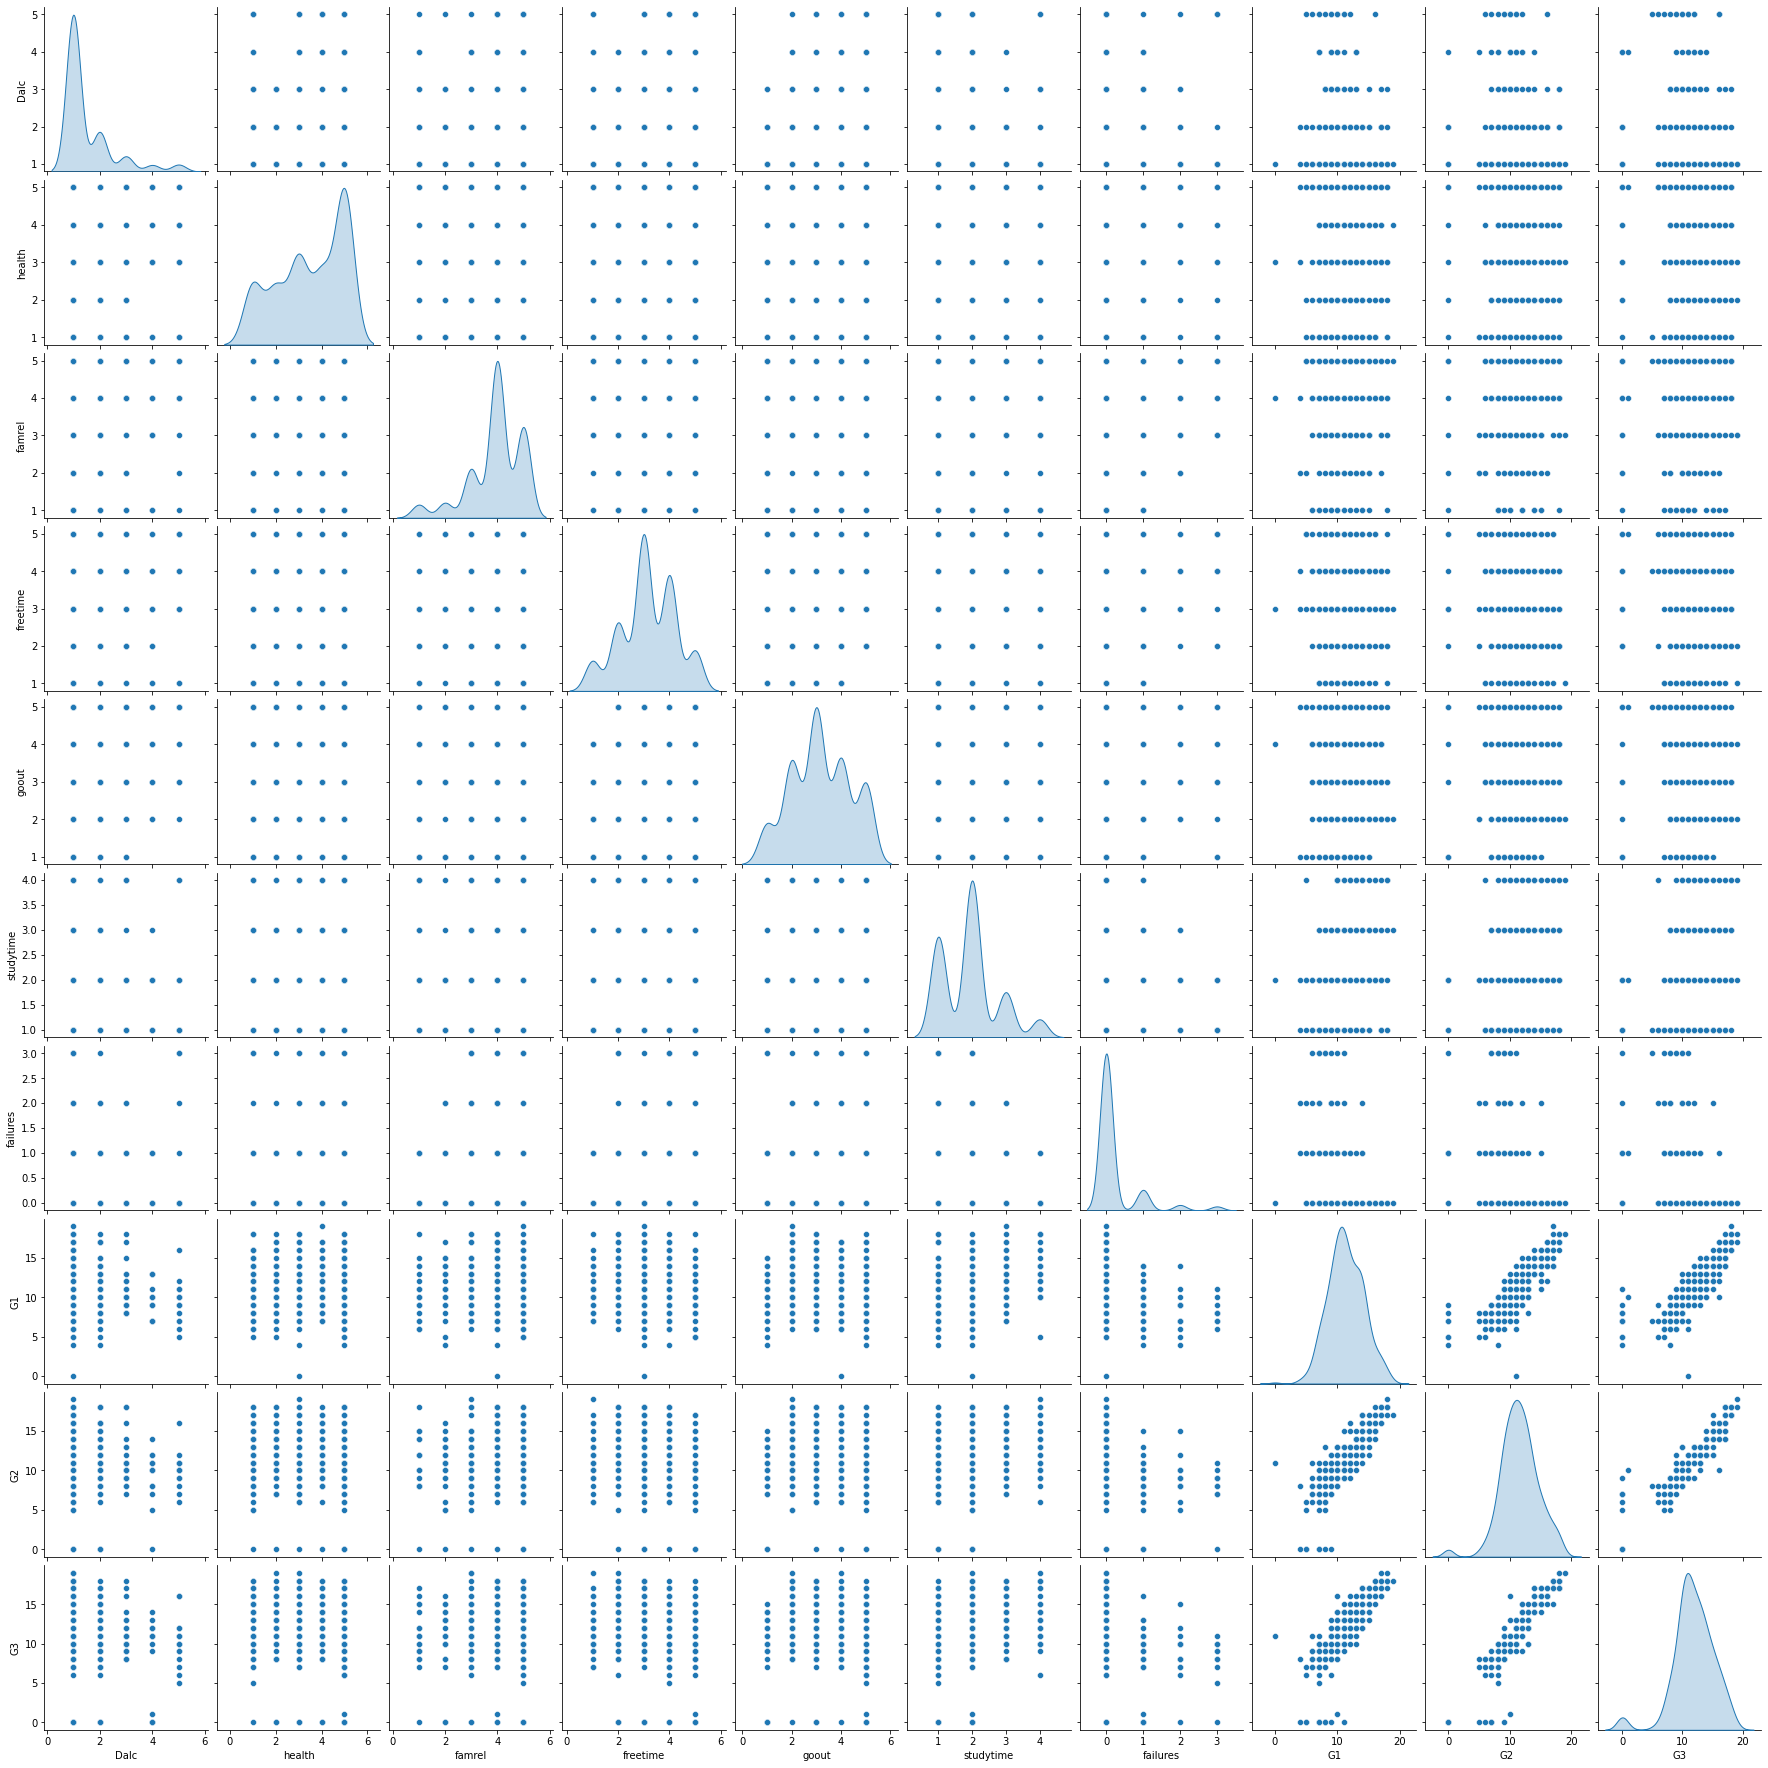

In [104]:
sns.pairplot(train_dataset_por[['Dalc', 'health', 'famrel', 'freetime', 'goout', 'studytime', 'failures', 'G1', 'G2', 'G3']], diag_kind='kde')

In [105]:
train_features_por = train_dataset_por.copy()
test_features_por = train_dataset_por.copy()

train_labels_por = train_features_por.pop('Dalc')
test_labels_por = test_features_por.pop('Dalc')

In [106]:
train_dataset_por.describe().transpose()[['mean', 'std']]

,mean,std
age,16.789981,1.236594
Medu,2.527938,1.124786
Fedu,2.290944,1.091444
traveltime,1.587669,0.755624
studytime,1.938343,0.822027
failures,0.231214,0.602848
famrel,3.915222,0.986658
freetime,3.165703,1.052437
goout,3.173410,1.184189
Dalc,1.520231,0.964162


In [111]:
normalizer = preprocessing.Normalization()

In [112]:
normalizer.adapt(np.array(train_features_por))

In [113]:
print(normalizer.mean.numpy())

[16.78998     2.5279386   2.2909443   1.5876684   1.9383429   0.2312139
  3.915222    3.1657035   3.173411    2.2716765   3.4778419   3.6184976
 11.344894   11.516377   11.843932    0.6377649   0.36223507  0.6223507
  0.37764928  0.2947977   0.70520234  0.7090559   0.29094413  0.13102119
  0.86897874  0.21579958  0.07707129  0.39306358  0.2080925   0.10597303
  0.06358381  0.03660886  0.5703275   0.27745664  0.05202313  0.4315992
  0.23699424  0.10982657  0.22157997  0.22157998  0.7129094   0.0655106
  0.9017341   0.09826589  0.3872833   0.6127168   0.94026977  0.05973025
  0.54335266  0.4566474   0.19267823  0.8073218   0.10597304  0.89402705
  0.25433525  0.7456648   0.6300577   0.36994222]


In [114]:
first = np.array(train_features_por[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[16  2  1  2  2  0  4  2  2  4  5  2  9  7  8  0  1  0  1  0  1  1  0  0
   1  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  1  0  1  0  1  0  1  0
   1  0  1  0  0  1  0  1  0  1]]

Normalized: [[-0.64 -0.47 -1.18  0.55  0.08 -0.38  0.09 -1.11 -0.99  1.32  1.05 -0.35
  -0.83 -1.49 -1.16 -1.33  1.33 -1.28  1.28 -0.65  0.65  0.64 -0.64 -0.39
   0.39 -0.52  3.46 -0.8  -0.51 -0.34 -0.26 -0.19 -1.15  1.61 -0.23 -0.87
  -0.56  2.85 -0.53 -0.53  0.63 -0.26  0.33 -0.33  1.26 -1.26  0.25 -0.25
   0.92 -0.92  2.05 -2.05 -0.34  0.34 -0.58  0.58 -1.31  1.31]]


In [115]:
health = np.array(train_features_por['health'])

health_normalizer = preprocessing.Normalization(input_shape=[1,])
health_normalizer.adapt(health)

In [116]:
health_model = tf.keras.Sequential([
    health_normalizer,
    layers.Dense(units=1)
])

health_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [117]:
health_model.predict(health[:5])

array([[ 0.0212422 ],
       [-0.02062375],
       [-0.03457906],
       [ 0.00728688],
       [-0.02062375]], dtype=float32)

In [118]:
health_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [119]:
train_labels_por

532    1
375    2
306    3
625    1
480    1
      ..
121    1
507    1
228    1
445    2
117    1
Name: Dalc, Length: 519, dtype: int64

In [120]:
%%time
history = health_model.fit(
    train_features_por['health'], train_labels_por,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.32 s, sys: 152 ms, total: 3.48 s
Wall time: 3.12 s


In [121]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.515099,0.584302,95
96,0.513905,0.590916,96
97,0.519846,0.582688,97
98,0.518879,0.588185,98
99,0.524371,0.581833,99


In [122]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Dalc]')
  plt.legend()
  plt.grid(True)

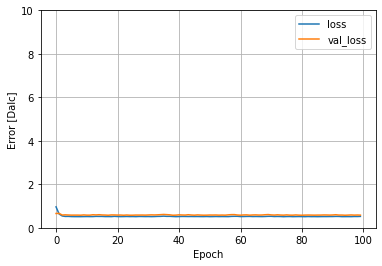

In [123]:
plot_loss(history)

In [124]:
test_results = {}

test_results['health_model'] = health_model.evaluate(
    test_features_por['health'],
    test_labels_por, verbose=0)

In [125]:
x = tf.linspace(0.0, 250, 251)
y = health_model.predict(x)

In [127]:
def plot_health(x, y):
  plt.scatter(train_features_por['health'], train_labels_por, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('health')
  plt.ylabel('Dalc')
  plt.legend()

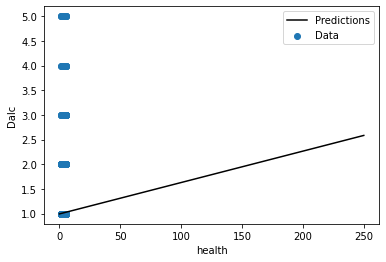

In [128]:
plot_health(x,y)